In [1]:
#importations des packages
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/sylva/OneDrive/Bureau/barometre/donnees_brutes_2021.csv", sep=";")

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
var_note =['Agencement_voirie', 'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information']

In [4]:
var_indicateur=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global']

In [4]:
p=re.compile('(\D*) \(([0-9]{2,2})[0-9]{3,3}\)')
def yo_ville(x):
    m=p.match(x)
    return m.group(1)+' ' +m.group(2)
df['Ville']=df['Commune'].apply(yo_ville)

In [6]:
def yo_float(x):
    return float(str(x).replace(',','.'))

def indicateurs_nombres(df1, liste_indicateur=var_indicateur):
    for indicateur in var_indicateur :
        if indicateur in df1.columns:
            df1[indicateur]=df1[indicateur].apply(yo_float)
    return df1
df=indicateurs_nombres(df)


In [7]:
df_car=df[['Commune', 'Malvoyant', 'Taille_commune_2', 'Pratique de la marche',
       'Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Deplacement_a_pied', 'Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche',
       'Membre_association_marche',
       'Membre_association_defense_pietons', 'Sexe_repondant', 'Age_repondant',
       'Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global',
       'Indicateur_global_declare', 'Ville']]

In [8]:


def tt_dataville_(df, commune='Ville', var_note=var_note) :
    liste_ville=df[commune].unique()
    grosse_ville=[]
    for ville in liste_ville :
        df_ville1=df[df[commune]==ville]
        if df_ville1[commune].count()>=50 :#and df_ville1[df_ville1['Membre_association_marche']=='Non']['Membre_association_marche'].count()>40:
            grosse_ville+=[ville]#on va se concentrer sur les grandes villes
    for col in df.columns:
        df_carbis=df_car[df_car[col].notna()]        
    print(len(grosse_ville))
    dataville=pd.DataFrame()
    dataville[commune]=np.array(grosse_ville)
    for col in var_note:
        liste=[]
        liste_ecart=[]
        liste_sans=[]
        liste_marche=[]
        for ville in grosse_ville:
            donnees=df_carbis[df_carbis[commune]==ville]
            ecart_type=np.std(donnees[col])
            moyenne=np.mean(donnees[col])
            liste.append(moyenne)
            liste_ecart.append(ecart_type)
            liste_sans.append(np.mean(donnees[donnees['Membre_association_marche']=='Non'][col]))
            liste_marche.append(np.mean(donnees[donnees['Membre_association_marche']=='Oui'][col]))
        dataville[col]=np.array(liste)
        dataville[col+'_std']=np.array(liste_ecart)
        dataville[col+'_sans']=np.array(liste_sans)
        dataville[col+'_diff']=dataville[col]-dataville[col+'_sans']
        dataville[col+'_marche']=np.array(liste_marche)
        dataville[col+'_grande_diff']=dataville[col+'_marche']-dataville[col+'_sans']
        
    liste_femme=[]
    liste_marcheur=[]
    liste_nombre=[]
    for ville in grosse_ville:
        donnees=df_carbis[df_carbis[commune]==ville]
        nbre_femme=sum(donnees['Sexe_repondant']=='Femme')
        nbre_homme=sum(donnees['Sexe_repondant']=='Homme')
        nbre_marcheur=sum(donnees['Membre_association_marche']=='Oui')
        nbre_non_marcheur=sum(donnees['Membre_association_marche']=='Non')
        liste_femme.append(nbre_femme/(nbre_femme+nbre_homme))
        liste_marcheur.append(nbre_marcheur/(nbre_marcheur+nbre_non_marcheur))
        liste_nombre.append(nbre_non_marcheur)
    dataville['pourcent_femme']=np.array(liste_femme)
    dataville['pourcent_marcheur']=np.array(liste_marcheur)
    dataville['nombre_non_marcheur']=np.array(liste_nombre)
    return dataville
dataville_indic=tt_dataville_(df_car, var_note=['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])
dataville_indic_global=tt_dataville_(df_car, var_note=['Indicateur_global'])

154
154


In [9]:
df_sans=df_car[df_car['Membre_association_marche']=='Non']
dataville_sans=tt_dataville_(df_sans, var_note=var_note+['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])
"""df_marche=df_car[df_car['Membre_association_marche']=='Oui']
dataville_marche=tt_dataville_(df_marche, var_note=var_note+['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])"""

113


"df_marche=df_car[df_car['Membre_association_marche']=='Oui']\ndataville_marche=tt_dataville_(df_marche, var_note=var_note+['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', \n       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',\n       'Indicateur_amenagements_services'])"

In [11]:

indic=['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services']
for i in indic :
    print(i, np.mean(dataville_indic[i+'_grande_diff']))

Indicateur_global 0.2718203206302857
Indicateur_securite 0.32263416972094733
Indicateur_ressenti_global 0.30326738911623907
Indicateur_confort 0.22384087156814167
Indicateur_effort_ville 0.28411229052953246
Indicateur_global_declare 0.31926255416519117
Indicateur_amenagements_services 0.2252468822414889


In [11]:
note=['Agencement_voirie',
       'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
       'Amenagements_confort_marcheurs', 'Trottoirs_eclaires',
       'Commune_ecoute_pietons', 'Commune_effort_marche', 'Situation_pietons',
       'Promotion_deplacement', 'Stationnement_espaces_pietons',
       'Acces_transport_commun', 'Signaletique', 'Information',
       'Resume_condition_marche']
dataville_note=tt_dataville_(df_car, var_note=note)
for i in note :
    print(i, np.mean(dataville_note[i+'_diff']))

Agencement_voirie 0.07117223693516889
conflits_pietons 0.04163646353153989
Conducteurs_respectent 0.08816991332910426
Circulation_vehicules_motorises 0.06783279856113533
Deplacements_pied_commune -0.01247527740358207
Marche_securite 0.05324010597653118
Securite_rues_services 0.040837710834178954
Securite_rues_residentielles 0.07069911460086865
Securite_rejoindre_communes_voisines 0.10525756493702705
Acces_pietons 0.05528179050353267
Marche_separe_circulation -0.01853661174975855
Marche_separe_autres_mobilites 0.03365501117163252
Traverse_carrefour 0.07367863784863019
Deplacements_enfants_personnes_agees 0.0801584893618152
Deplacements_enfants_ecole 0.0808955374142977
Pistes_cyclables 0.008101779826472033
Espaces_pietons 0.06623499777978828
Espaces_pietons_libres_empietements 0.06504644648680916
Espaces_pietons_entretenus 0.018790959177302387
Espaces_pietons_travaux 0.06668661786893042
Signaletique_specifique 0.061877449480354174
Amenagements_confort_marcheurs 0.032138265693017934
Trott

In [9]:
dataville=tt_dataville_(df_car, var_note=['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])

In [32]:
display(dataville_indic_global.sort_values('Indicateur_global_diff', ascending=False)[['Ville', 'Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur', 'Indicateur_global_diff', 'Indicateur_global_marche', 'Indicateur_global_grande_diff']].head(12))

display(dataville_indic_global.sort_values('Indicateur_global', ascending=False)[['Ville', 'Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur', 'Indicateur_global_diff', 'Indicateur_global_marche', 'Indicateur_global_grande_diff']].head(12))
display(dataville_indic_global.sort_values('Indicateur_global_marche', ascending=False)[['Ville', 'Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur', 'Indicateur_global_diff', 'Indicateur_global_marche','Indicateur_global_grande_diff']].head(12))
dataville_indic_global.sort_values('Indicateur_global_sans', ascending=False)[['Ville', 'Indicateur_global_sans','Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur','Indicateur_global_grande_diff']].head(12)


,Ville,Indicateur_global,nombre_non_marcheur,pourcent_marcheur,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff
88,Montigny-le-Bretonneux 78,3.956063,33,0.459016,0.408925,4.438010,0.890872
84,Martigues 13,3.824130,26,0.666667,0.404487,4.026374,0.606731
33,Cagnes-sur-Mer 06,3.108513,25,0.528302,0.315402,3.390122,0.597011
109,Pibrac 31,3.835130,25,0.545455,0.261003,4.052632,0.478505
3,Albi 81,3.486289,23,0.530612,0.260565,3.716789,0.491064
98,Niort 79,3.329731,26,0.500000,0.237332,3.567063,0.474664
8,Antibes 06,2.945668,65,0.398148,0.225760,3.286932,0.567024
102,Orléans 45,3.135221,75,0.271845,0.211988,3.703047,0.779814
130,Salon-de-Provence 13,3.505190,33,0.340000,0.209760,3.912372,0.616941
111,Poitiers 86,3.310719,50,0.431818,0.207028,3.583124,0.479434


,Ville,Indicateur_global,nombre_non_marcheur,pourcent_marcheur,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff
80,Magny-les-Hameaux 78,4.358920,37,0.463768,0.028772,4.392187,0.062039
132,Sceaux 92,4.310183,51,0.037736,0.003289,4.394048,0.087154
64,La Motte-Servolex 73,4.289789,72,0.076923,-0.012994,4.133862,-0.168921
72,Le Rheu 35,4.206807,100,0.099099,0.012970,4.324711,0.130874
103,Pacé 35,4.065212,39,0.434783,-0.095299,3.941323,-0.219188
56,Gif-sur-Yvette 91,4.063705,53,0.053571,-0.010135,3.884656,-0.189183
74,Les Sables-d'Olonne 85,4.057226,49,0.430233,0.195394,4.315991,0.454159
150,Vincennes 94,4.025573,42,0.222222,0.057281,4.226058,0.257766
37,Chantepie 35,4.004023,37,0.274510,0.043094,4.117914,0.156985
88,Montigny-le-Bretonneux 78,3.956063,33,0.459016,0.408925,4.438010,0.890872


,Ville,Indicateur_global,nombre_non_marcheur,pourcent_marcheur,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff
129,Saint-Marcellin-en-Forez 42,3.463339,56,0.017544,0.019532,4.557143,1.113336
78,L'Isle-d'Abeau 38,3.593232,51,0.072727,0.070248,4.488889,0.965904
88,Montigny-le-Bretonneux 78,3.956063,33,0.459016,0.408925,4.438010,0.890872
132,Sceaux 92,4.310183,51,0.037736,0.003289,4.394048,0.087154
80,Magny-les-Hameaux 78,4.358920,37,0.463768,0.028772,4.392187,0.062039
72,Le Rheu 35,4.206807,100,0.099099,0.012970,4.324711,0.130874
101,Ombrée d'Anjou 49,3.682178,76,0.050000,0.033728,4.323016,0.674567
74,Les Sables-d'Olonne 85,4.057226,49,0.430233,0.195394,4.315991,0.454159
86,Metz 57,3.772898,56,0.243243,0.170907,4.304608,0.702616
150,Vincennes 94,4.025573,42,0.222222,0.057281,4.226058,0.257766


,Ville,Indicateur_global_sans,Indicateur_global,nombre_non_marcheur,pourcent_marcheur,Indicateur_global_grande_diff
80,Magny-les-Hameaux 78,4.330148,4.358920,37,0.463768,0.062039
132,Sceaux 92,4.306894,4.310183,51,0.037736,0.087154
64,La Motte-Servolex 73,4.302783,4.289789,72,0.076923,-0.168921
72,Le Rheu 35,4.193837,4.206807,100,0.099099,0.130874
103,Pacé 35,4.160511,4.065212,39,0.434783,-0.219188
56,Gif-sur-Yvette 91,4.073839,4.063705,53,0.053571,-0.189183
150,Vincennes 94,3.968292,4.025573,42,0.222222,0.257766
37,Chantepie 35,3.960929,4.004023,37,0.274510,0.156985
147,Versailles 78,3.934853,3.940008,276,0.051546,0.100015
74,Les Sables-d'Olonne 85,3.861832,4.057226,49,0.430233,0.454159


In [14]:
display(dataville_sans[dataville_sans['Ville']=='Martigues 13']['Indicateur_global'])
display(dataville_sans[dataville_sans['Ville']=='Montigny-le-Bretonneux 78']['Indicateur_global'])

Series([], Name: Indicateur_global, dtype: float64)

Series([], Name: Indicateur_global, dtype: float64)

In [15]:
display(dataville_indic_global.sort_values('Indicateur_global')[['Ville', 'Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur']].head(10))
dataville_indic_global.sort_values('Indicateur_global_sans')[['Ville', 'Indicateur_global_sans','Indicateur_global', 'nombre_non_marcheur', 'pourcent_marcheur']].head(10)

,Ville,Indicateur_global,nombre_non_marcheur,pourcent_marcheur
11,Aubervilliers 93,2.245511,55,0.140625
52,Marseille 13,2.254122,1043,0.183881
3,Alfortville 94,2.447460,90,0.100000
2,Ajaccio 20,2.455908,84,0.066667
10,Asnières-sur-Seine 92,2.475992,57,0.161765
65,Noisy-le-Sec 93,2.494351,74,0.129412
33,Deuil-la-Barre 95,2.606661,44,0.214286
25,Castelnau-le-Lez 34,2.647634,47,0.129630
100,Vitry-sur-Seine 94,2.693751,68,0.042254
14,Bègles 33,2.750832,158,0.159574


,Ville,Indicateur_global_sans,Indicateur_global,nombre_non_marcheur,pourcent_marcheur
52,Marseille 13,2.199627,2.254122,1043,0.183881
11,Aubervilliers 93,2.219553,2.245511,55,0.140625
10,Asnières-sur-Seine 92,2.337357,2.475992,57,0.161765
3,Alfortville 94,2.412540,2.447460,90,0.100000
65,Noisy-le-Sec 93,2.435564,2.494351,74,0.129412
2,Ajaccio 20,2.445455,2.455908,84,0.066667
33,Deuil-la-Barre 95,2.511075,2.606661,44,0.214286
25,Castelnau-le-Lez 34,2.607751,2.647634,47,0.129630
100,Vitry-sur-Seine 94,2.651657,2.693751,68,0.042254
14,Bègles 33,2.691285,2.750832,158,0.159574


In [16]:
sum(dataville_sans['nombre_non_marcheur']>0)

76

In [17]:
sum(dataville_sans['nombre_non_marcheur']<40)

0

In [10]:
dataville.sort_values('pourcent_marcheur', ascending=False).head(50)

,Ville,Indicateur_global,Indicateur_global_std,Indicateur_global_sans,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff,Indicateur_securite,Indicateur_securite_std,Indicateur_securite_sans,...,Indicateur_global_declare_grande_diff,Indicateur_amenagements_services,Indicateur_amenagements_services_std,Indicateur_amenagements_services_sans,Indicateur_amenagements_services_diff,Indicateur_amenagements_services_marche,Indicateur_amenagements_services_grande_diff,pourcent_femme,pourcent_marcheur,nombre_non_marcheur
53,Martigues 13,3.941472,0.864619,3.520370,0.421102,4.171164,0.650794,3.956427,0.792142,3.407407,...,0.818182,4.294118,1.030361,3.814815,0.479303,4.555556,0.740741,0.490196,0.647059,18
56,Montigny-le-Bretonneux 78,4.021972,0.876971,3.616961,0.405012,4.426984,0.810024,4.569959,0.738282,4.238683,...,0.851852,3.888889,0.989658,3.493827,0.395062,4.283951,0.790123,0.576923,0.500000,27
67,Pacé 35,4.021078,0.997381,4.152098,-0.131020,3.868221,-0.283877,4.200855,0.991904,4.293651,...,-0.255952,4.102564,1.125726,4.273810,-0.171245,3.902778,-0.371032,0.557692,0.461538,28
94,Vern-sur-Seiche 35,3.475845,0.842736,3.371429,0.104417,3.603840,0.232412,3.618357,0.938906,3.508772,...,0.116299,3.507246,1.011382,3.350877,0.156369,3.698925,0.348048,0.623188,0.449275,38
63,Nice 06,3.135838,0.794178,2.927831,0.208006,3.456515,0.528683,3.312386,0.873192,3.094595,...,0.740428,3.653005,0.993969,3.432432,0.220573,3.993056,0.560623,0.504274,0.393443,74
72,Poitiers 86,3.324883,0.859638,3.175397,0.149486,3.566361,0.390965,3.483660,0.958425,3.309524,...,0.554945,3.828431,0.990960,3.650794,0.177638,4.115385,0.464591,0.447761,0.382353,42
44,Le Havre 76,3.741732,0.801191,3.648810,0.092922,3.897841,0.249032,3.922056,0.845765,3.801587,...,0.136190,4.218905,0.995099,4.119048,0.099858,4.386667,0.267619,0.641791,0.373134,42
7,Antibes 06,2.954902,0.935362,2.698951,0.255951,3.449152,0.750200,3.109804,0.985073,2.817460,...,0.980296,3.282353,1.058431,3.011905,0.270448,3.804598,0.792693,0.433735,0.341176,56
96,Villeneuve-d'Ascq 59,3.752613,0.814769,3.596158,0.156455,4.080423,0.484265,3.960684,0.743808,3.803030,...,0.726190,4.117949,1.106980,3.931818,0.186131,4.507937,0.576118,0.615385,0.323077,44
93,Valence 26,3.239968,0.688479,3.162185,0.077783,3.405258,0.243073,3.408889,0.776965,3.323529,...,0.327206,3.753333,0.855856,3.666667,0.086667,3.937500,0.270833,0.510204,0.320000,34


In [19]:
sum(abs(dataville['Indicateur_global_diff'])>.1)

16

In [20]:
dataville[dataville['Indicateur_global_diff']>.1].sort_values('pourcent_marcheur', ascending=False).head(16)

,Ville,Indicateur_global,Indicateur_global_std,Indicateur_global_sans,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff,Indicateur_securite,Indicateur_securite_std,Indicateur_securite_sans,...,Indicateur_global_declare_grande_diff,Indicateur_amenagements_services,Indicateur_amenagements_services_std,Indicateur_amenagements_services_sans,Indicateur_amenagements_services_diff,Indicateur_amenagements_services_marche,Indicateur_amenagements_services_grande_diff,pourcent_femme,pourcent_marcheur,nombre_non_marcheur
53,Martigues 13,3.941472,0.864619,3.520370,0.421102,4.171164,0.650794,3.956427,0.792142,3.407407,...,0.818182,4.294118,1.030361,3.814815,0.479303,4.555556,0.740741,0.490196,0.647059,18
56,Montigny-le-Bretonneux 78,4.021972,0.876971,3.616961,0.405012,4.426984,0.810024,4.569959,0.738282,4.238683,...,0.851852,3.888889,0.989658,3.493827,0.395062,4.283951,0.790123,0.576923,0.500000,27
93,Vern-sur-Seiche 35,3.475845,0.842736,3.371429,0.104417,3.603840,0.232412,3.618357,0.938906,3.508772,...,0.116299,3.507246,1.011382,3.350877,0.156369,3.698925,0.348048,0.623188,0.449275,38
63,Nice 06,3.135838,0.794178,2.927831,0.208006,3.456515,0.528683,3.312386,0.873192,3.094595,...,0.740428,3.653005,0.993969,3.432432,0.220573,3.993056,0.560623,0.504274,0.393443,74
72,Poitiers 86,3.324883,0.859638,3.175397,0.149486,3.566361,0.390965,3.483660,0.958425,3.309524,...,0.554945,3.828431,0.990960,3.650794,0.177638,4.115385,0.464591,0.447761,0.382353,42
7,Antibes 06,2.954902,0.935362,2.698951,0.255951,3.449152,0.750200,3.109804,0.985073,2.817460,...,0.980296,3.282353,1.058431,3.011905,0.270448,3.804598,0.792693,0.433735,0.341176,56
95,Villeneuve-d'Ascq 59,3.752613,0.814769,3.596158,0.156455,4.080423,0.484265,3.960684,0.743808,3.803030,...,0.726190,4.117949,1.106980,3.931818,0.186131,4.507937,0.576118,0.615385,0.323077,44
87,Toulon 83,3.163842,0.860552,3.042648,0.121193,3.442953,0.400305,3.469929,0.948036,3.339181,...,0.527113,3.559633,0.971438,3.359649,0.199984,4.020202,0.660553,0.457143,0.302752,76
66,Orléans 45,3.160370,0.886439,2.955556,0.204814,3.765908,0.810352,3.327228,0.989617,3.096405,...,0.955882,3.695971,1.011108,3.524510,0.171461,4.202899,0.678389,0.366667,0.252747,68
55,Metz 57,3.777505,0.943573,3.581074,0.196431,4.458466,0.877391,4.099502,0.953137,3.914530,...,1.001282,4.273632,0.944435,4.096154,0.177478,4.888889,0.792735,0.378788,0.223881,52


In [21]:
femme_sans=sum(df_sans['Sexe_repondant']=='Femme')
homme_sans=sum(df_sans['Sexe_repondant']=='Homme')
pourcent_femme=femme_sans/(femme_sans+homme_sans)
print(pourcent_femme)
df_marcheur=df[df['Membre_association_marche']=='Oui']
homme_marcheur=sum(df_marcheur['Sexe_repondant']=='Homme')
femme_marcheuse=sum(df_marcheur['Sexe_repondant']=='Femme')
pourcent_femme_marcheur=femme_marcheuse/(femme_marcheuse+homme_marcheur)
pourcent_femme_marcheur

0.5553431391674145


0.5462064005753327

In [22]:
age_marcheur=[]
age_sans=[]
for age in df['Age_repondant'].dropna().unique():
    age_marcheur.append(sum(df_marcheur['Age_repondant']==age))
    age_sans.append(sum(df_sans['Age_repondant']==age))


age_marcheur_pourcent=[]
total_marcheur=sum(age_marcheur)
for nombre in age_marcheur :
    age_marcheur_pourcent.append(nombre/total_marcheur)
    
age_sans_pourcent=[]
total_sans=sum(age_sans)
for nombre in age_sans :
    age_sans_pourcent.append(nombre/total_sans)

print(df['Age_repondant'].dropna().unique())
print('non marcheur', age_sans_pourcent)
print('marcheur',age_marcheur_pourcent)

['De 45 à 54 ans' 'De 65 à 74 ans' 'De 35 à 44 ans' 'De 26 à 34 ans'
 '75 ans et plus' 'De 55 à 64 ans' 'De 18 à 25 ans' 'Moins de 18 ans']
non marcheur [0.20425482892362046, 0.12664644214891901, 0.2527552705349257, 0.16109212395837333, 0.026573480281095196, 0.1782957643715679, 0.04715640720402442, 0.0032256825774739832]
marcheur [0.06783740417186664, 0.5143519343911571, 0.023890176502050275, 0.013282224995542878, 0.08299162060973436, 0.29194152255303973, 0.0028525583883045108, 0.0028525583883045108]


In [23]:
com_marcheur=[]
com_sans=[]
for com in df['Taille_commune_2'].dropna().unique():
    com_marcheur.append(sum(df_marcheur['Taille_commune_2']==com))
    com_sans.append(sum(df_sans['Taille_commune_2']==com))


com_marcheur_pourcent=[]
total_marcheur=sum(com_marcheur)
for nombre in com_marcheur :
    com_marcheur_pourcent.append(nombre/total_marcheur)
    
com_sans_pourcent=[]
total_sans=sum(com_sans)
for nombre in com_sans :
    com_sans_pourcent.append(nombre/total_sans)

print(df['Taille_commune_2'].dropna().unique())
print('non marcheur',com_sans_pourcent)
print('marcheur',com_marcheur_pourcent)

['De 5000 et 19 999 habitants' 'De 100 000 et 199 999 habitants'
 'De 20 000 et 49 999 habitants' 'De 50 000 et 99 999 habitants'
 '200 000 habitants ou plus' 'Moins de 5000 habitants']
non marcheur [0.18931684651127068, 0.1804846204062824, 0.17595330440459275, 0.09715448715487117, 0.2771014937982412, 0.07998924772474175]
marcheur [0.2856124086289891, 0.09324300231770369, 0.19014084507042253, 0.08530932430023178, 0.11330005348546979, 0.2323943661971831]


In [24]:
df[['Deplacement_a_pied_vie_courante', 'Deplacement_a_pied_loisir',
       'Lieu_marche', 'Pratique de la marche' ]]

,Deplacement_a_pied_vie_courante,Deplacement_a_pied_loisir,Lieu_marche,Pratique de la marche
0,1 à 3 fois par semaine,Presque jamais,Hors des espaces urbanisés,1 à 3 fois par semaine/Presque jamais
1,Tous les jours ou presque,1 à 3 fois par mois,Dans les espaces urbanisés*,Tous les jours ou presque/1 à 3 fois par mois
2,1 à 3 fois par mois,1 à 3 fois par mois,Hors des espaces urbanisés,1 à 3 fois par mois/1 à 3 fois par mois
3,Tous les jours ou presque,1 à 3 fois par semaine,Dans les espaces urbanisés*,Tous les jours ou presque/1 à 3 fois par semaine
4,Tous les jours ou presque,1 à 3 fois par mois,Dans les espaces urbanisés*,Tous les jours ou presque/1 à 3 fois par mois
...,...,...,...,...
43262,Tous les jours ou presque,Tous les jours ou presque,Hors des espaces urbanisés,Tous les jours ou presque/Tous les jours ou pr...
43263,1 à 3 fois par semaine,1 à 3 fois par semaine,Hors des espaces urbanisés,1 à 3 fois par semaine/1 à 3 fois par semaine
43264,Presque jamais,Presque jamais,Hors des espaces urbanisés,Presque jamais/Presque jamais
43265,Tous les jours ou presque,1 à 3 fois par semaine,Dans les espaces urbanisés*,Tous les jours ou presque/1 à 3 fois par semaine


In [25]:
com_marcheur=[]
com_sans=[]
for com in df['Deplacement_a_pied_loisir'].dropna().unique():
    com_marcheur.append(sum(df_marcheur['Deplacement_a_pied_loisir']==com))
    com_sans.append(sum(df_sans['Deplacement_a_pied_loisir']==com))


com_marcheur_pourcent=[]
total_marcheur=sum(com_marcheur)
for nombre in com_marcheur :
    com_marcheur_pourcent.append(nombre/total_marcheur)
    
com_sans_pourcent=[]
total_sans=sum(com_sans)
for nombre in com_sans :
    com_sans_pourcent.append(nombre/total_sans)

print(df['Deplacement_a_pied_loisir'].dropna().unique())
print('non marcheur',com_sans_pourcent)
print('marcheur',com_marcheur_pourcent)

['Presque jamais' '1 à 3 fois par mois' '1 à 3 fois par semaine'
 'Tous les jours ou presque']
non marcheur [0.08091087131830575, 0.19254252908874467, 0.42367804615798166, 0.30286855343496794]
marcheur [0.03583526475307541, 0.12818684257443394, 0.4779818149402746, 0.3579960777322161]


In [26]:
com_marcheur=[]
com_sans=[]
for com in df['Deplacement_a_pied_vie_courante'].dropna().unique():
    com_marcheur.append(sum(df_marcheur['Deplacement_a_pied_vie_courante']==com))
    com_sans.append(sum(df_sans['Deplacement_a_pied_vie_courante']==com))


com_marcheur_pourcent=[]
total_marcheur=sum(com_marcheur)
for nombre in com_marcheur :
    com_marcheur_pourcent.append(nombre/total_marcheur)
    
com_sans_pourcent=[]
total_sans=sum(com_sans)
for nombre in com_sans :
    com_sans_pourcent.append(nombre/total_sans)

print(df['Deplacement_a_pied_vie_courante'].dropna().unique())
print('stat des non marcheurs',com_sans_pourcent)
print('stat des marcheurs',com_marcheur_pourcent)

['1 à 3 fois par semaine' 'Tous les jours ou presque'
 '1 à 3 fois par mois' 'Presque jamais']
stat des non marcheurs [0.24515187588802273, 0.6707115702161975, 0.053991782189624055, 0.030144771706155676]
stat des marcheurs [0.307184881440542, 0.5754145123908005, 0.06935282581565341, 0.0480477803530041]


In [27]:
com_marcheur=[]
com_sans=[]
for com in df['Lieu_marche'].dropna().unique():
    com_marcheur.append(sum(df_marcheur['Lieu_marche']==com))
    com_sans.append(sum(df_sans['Lieu_marche']==com))


com_marcheur_pourcent=[]
total_marcheur=sum(com_marcheur)
for nombre in com_marcheur :
    com_marcheur_pourcent.append(nombre/total_marcheur)
    
com_sans_pourcent=[]
total_sans=sum(com_sans)
for nombre in com_sans :
    com_sans_pourcent.append(nombre/total_sans)

print(df['Lieu_marche'].dropna().unique())
print('non marcheurs',com_sans_pourcent)
print('marcheurs',com_marcheur_pourcent)

['Hors des espaces urbanisés' 'Dans les espaces urbanisés*']
non marcheurs [0.13762912330555663, 0.8623708766944433]
marcheurs [0.4148689605990373, 0.5851310394009628]


<AxesSubplot:>

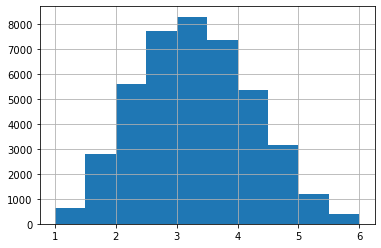

In [28]:
df['Indicateur_global'].hist()

In [29]:
df[df['Indicateur_global']==1]

,Commune,Code_INSEE,Commune_cp,Dep,Cp,Nom_dep,Nom_region,Malvoyant,Taille_commune_2,Pratique de la marche,...,Nom_dep_residence_OK,Nom_region_residence_OK,Indicateur_ressenti_global,Indicateur_securite,Indicateur_confort,Indicateur_effort_ville,Indicateur_amenagements_services,Indicateur_global,Indicateur_global_declare,Ville
548,Alfortville (94140),94002,Alfortville,94,94140,Val-de-Marne,Île-de-France,Non,De 20 000 et 49 999 habitants,Tous les jours ou presque/1 à 3 fois par semaine,...,Val-de-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Alfortville 94
997,Angers (49000),49007,Angers,49,49000,Maine-et-Loire,Pays de la Loire,Non,De 100 000 et 199 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Maine-et-Loire,Pays de la Loire,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Angers 49
1055,Angers (49100),49007,Angers,49,49100,Maine-et-Loire,Pays de la Loire,Non,De 100 000 et 199 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Maine-et-Loire,Pays de la Loire,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Angers 49
1102,Angers (49000),49007,Angers,49,49000,Maine-et-Loire,Pays de la Loire,Non,De 100 000 et 199 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Maine-et-Loire,Pays de la Loire,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Angers 49
2176,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77
2177,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,1 à 3 fois par semaine/Presque jamais,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77
2179,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,1 à 3 fois par semaine/Presque jamais,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77
2196,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,Tous les jours ou presque/1 à 3 fois par semaine,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77
2201,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77
2202,Avon (77210),77014,Avon,77,77210,Seine-et-Marne,Île-de-France,Non,De 5000 et 19 999 habitants,Tous les jours ou presque/Tous les jours ou pr...,...,Seine-et-Marne,Île-de-France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Avon 77


In [32]:
dataville_indic_global

,Ville,Indicateur_global,Indicateur_global_std,Indicateur_global_sans,Indicateur_global_diff,Indicateur_global_marche,Indicateur_global_grande_diff,pourcent_femme,pourcent_marcheur,nombre_non_marcheur
0,Aix-en-Provence 13,3.269819,0.893457,3.233758,0.036061,3.361033,0.127275,0.583333,0.283333,129
1,Aix-les-Bains 73,3.901778,1.015126,3.853761,0.048017,4.177877,0.324116,0.500000,0.148148,46
2,Ajaccio 20,2.455908,0.691928,2.445455,0.010453,2.602249,0.156793,0.586207,0.066667,84
3,Alfortville 94,2.447460,0.754060,2.412540,0.034921,2.761746,0.349206,0.626263,0.100000,90
4,Amiens 80,2.919090,0.934290,2.838203,0.080887,3.423077,0.584874,0.419355,0.138298,81
...,...,...,...,...,...,...,...,...,...,...
96,Villeurbanne 69,3.245082,0.815584,3.218644,0.026439,3.511767,0.293123,0.588710,0.090196,232
97,Vincennes 94,3.993407,0.761724,3.955439,0.037967,4.134921,0.179481,0.634615,0.211538,41
98,Vitré 35,3.319621,0.842906,3.296328,0.023294,3.548677,0.252350,0.609375,0.092308,59
99,Vitrolles 13,3.384099,0.969228,3.331167,0.052931,3.701687,0.370519,0.722222,0.142857,48


In [34]:

for col in df_car.columns:
    df_car=df_car[df_car[col].notna()]

def tt_dataville_sexe(df, commune='Ville', var_note=var_note) :
    liste_ville=df[commune].unique()
    grosse_ville=[]
    for ville in liste_ville :
        df_ville1=df[df[commune]==ville]
        if df_ville1[commune].count()>50 :#and df_ville1[df_ville1['Membre_association_marche']=='Non']['Membre_association_marche'].count()>40:
            grosse_ville+=[ville]#on va se concentrer sur les grandes villes
    dataville=pd.DataFrame()
    dataville[commune]=np.array(grosse_ville)
    for col in var_note:
        liste=[]
        liste_ecart=[]
        liste_femme=[]
        liste_homme=[]
        for ville in grosse_ville:
            donnees=df[df[commune]==ville]
            ecart_type=np.std(donnees[col])
            moyenne=np.mean(donnees[col])
            liste.append(moyenne)
            liste_ecart.append(ecart_type)
            liste_femme.append(np.mean(donnees[donnees['Sexe_repondant']=='Femme'][col]))
            liste_homme.append(np.mean(donnees[donnees['Sexe_repondant']=='Homme'][col]))
        dataville[col]=np.array(liste)
        dataville[col+'_std']=np.array(liste_ecart)
        dataville[col+'_femme']=np.array(liste_femme)
        dataville[col+'_diff']=dataville[col]-dataville[col+'_femme']
        dataville[col+'_homme']=np.array(liste_homme)
        dataville[col+'_diff_hf']=dataville[col+'_homme']-dataville[col+'_femme']
        
    liste_femme=[]
    liste_marcheur=[]
    liste_nombre=[]
    for ville in grosse_ville:
        donnees=df[df[commune]==ville]
        nbre_femme=sum(donnees['Sexe_repondant']=='Femme')
        nbre_homme=sum(donnees['Sexe_repondant']=='Homme')
        nbre_marcheur=sum(donnees['Membre_association_marche']=='Oui')
        nbre_non_marcheur=sum(donnees['Membre_association_marche']=='Non')
        liste_femme.append(nbre_femme/(nbre_femme+nbre_homme))
        liste_marcheur.append(nbre_marcheur/(nbre_marcheur+nbre_non_marcheur))
        liste_nombre.append(nbre_non_marcheur)
    dataville['pourcent_femme']=np.array(liste_femme)
    dataville['pourcent_marcheur']=np.array(liste_marcheur)
    dataville['nombre_non_marcheur']=np.array(liste_nombre)
    return dataville
dataville_indic=tt_dataville_(df_car, var_note=['Indicateur_global', 'Indicateur_securite', 'Indicateur_ressenti_global', 
       'Indicateur_confort', 'Indicateur_effort_ville',  'Indicateur_global_declare',
       'Indicateur_amenagements_services'])
dataville_indic_global_sexe=tt_dataville_sexe(df_car, var_note=['Indicateur_global'])

In [35]:
dataville_indic_global_sexe

,Ville,Indicateur_global,Indicateur_global_std,Indicateur_global_femme,Indicateur_global_diff,Indicateur_global_homme,Indicateur_global_diff_hf,pourcent_femme,pourcent_marcheur,nombre_non_marcheur
0,Aix-en-Provence 13,3.269819,0.893457,3.340907,-0.071088,3.170296,-0.170611,0.583333,0.283333,129
1,Aix-les-Bains 73,3.901778,1.015126,4.086655,-0.184877,3.716902,-0.369753,0.500000,0.148148,46
2,Ajaccio 20,2.455908,0.691928,2.469234,-0.013326,2.488668,0.019434,0.586207,0.066667,84
3,Alfortville 94,2.447460,0.754060,2.462762,-0.015302,2.386379,-0.076383,0.626263,0.100000,90
4,Amiens 80,2.919090,0.934290,3.064042,-0.144952,2.820576,-0.243465,0.419355,0.138298,81
...,...,...,...,...,...,...,...,...,...,...
96,Villeurbanne 69,3.245082,0.815584,3.312606,-0.067524,3.216441,-0.096165,0.588710,0.090196,232
97,Vincennes 94,3.993407,0.761724,4.139394,-0.145987,3.739850,-0.399544,0.634615,0.211538,41
98,Vitré 35,3.319621,0.842906,3.400407,-0.080786,3.207111,-0.193296,0.609375,0.092308,59
99,Vitrolles 13,3.384099,0.969228,3.430749,-0.046650,3.429630,-0.001119,0.722222,0.142857,48


In [36]:
np.mean(dataville_indic_global_sexe['Indicateur_global_diff_hf'])

-0.027656259959074534

In [1]:
773/(773+563)

0.5785928143712575

In [15]:
df=pd.read_csv(r'C:\Users\sylva\OneDrive\Bureau\barometre\tableau 05.csv', sep=';')
df_marseille=df[df['Ville']=='Marseille 13']

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df_marseille.columns[:80]

Index(['Nom_dep', 'Taille_commune_2', 'Taux_pauvrete', 'lettre',
       'moyenneIndicateur_global', 'lettre_cycl', 'niveau_vie_median_milliers',
       'Loisir', 'Utilitaire', 'Nom_region', 'Malvoyant',
       'Pratique de la marche', 'Deplacement_a_pied_vie_courante',
       'Deplacement_a_pied_loisir', 'Lieu_marche', 'Deplacement_a_pied',
       'Agencement_voirie', 'conflits_pietons', 'Conducteurs_respectent',
       'Circulation_vehicules_motorises', 'Deplacements_pied_commune',
       'Marche_securite', 'Securite_rues_services',
       'Securite_rues_residentielles', 'Securite_rejoindre_communes_voisines',
       'Acces_pietons', 'Marche_separe_circulation',
       'Marche_separe_autres_mobilites', 'Traverse_carrefour',
       'Deplacements_enfants_personnes_agees', 'Deplacements_enfants_ecole',
       'Pistes_cyclables', 'Espaces_pietons',
       'Espaces_pietons_libres_empietements', 'Espaces_pietons_entretenus',
       'Espaces_pietons_travaux', 'Signaletique_specifique',
     

In [18]:
liste=['Courses',
       'Ecole_autre', 'Promenade', 'Vers_loisirs', 'Sport', 'Travail']
for i in liste :
    print(i, sum(df_marseille[i]))

Courses 1150
Ecole_autre 246
Promenade 718
Vers_loisirs 429
Sport 607
Travail 629


In [20]:
for i in df_marseille['Raisons_pas_deplacement_pied'].unique():
    print(i, df_marseille[df_marseille['Raisons_pas_deplacement_pied']==i].shape)

nan (0, 143)
Espaces piétons trop utilisés par d'autres mobilités actives (1, 143)
Les cheminements n'offrent pas assez d'agrément;J'habite trop loin de mes lieux de destination (1, 143)
J'habite trop loin de mes lieux de destination (1, 143)
Trop de véhicules motorisés;Espaces piétons trop encombrés;Je ne me sens pas en sécurité à pied (1, 143)
Pas assez d'aménagements piétons et marcheurs;Trop de bruit;J'habite trop loin de mes lieux de destination (1, 143)
Trop de pollutions;Je préfère utiliser ma voiture;J'habite trop loin de mes lieux de destination (1, 143)
Trop de pollutions;Espaces piétons trop encombrés;Pas assez d'aménagements piétons et marcheurs (1, 143)
Pour des raisons de santé, parce que j'ai du mal a me déplacer à pied (1, 143)
Les cheminements n'offrent pas assez d'agrément;Trop de véhicules motorisés;Pas assez d'aménagements piétons et marcheurs (1, 143)
Je préfère utiliser ma voiture;J'habite trop loin de mes lieux de destination;Parce que c'est trop lent (1, 143)
Tr